<a href="https://colab.research.google.com/github/BahunuthulaHarini/Chest-X-ray-Images-Pneumonia-using-Convolutional-Neural-Networks-/blob/main/Harini_pytorch_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Selection**

In [ ]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import pickle
import os
import numpy as np
import cv2
%matplotlib inline

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
data= 'https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data'
od.download(data)

100%|██████████| 2.29G/2.29G [00:35<00:00, 68.7MB/s]


The above code snippet downloads the Chest X-ray Images (Pneumonia) dataset from Kaggle using the `opendatasets` library, with explicitly mentioning the use of a 'kaggle.json' file for authentication.

# **Data Preprocessing**

In [ ]:
# Define labels and image size
labels = ['PNEUMONIA', 'NORMAL']
img_size = 200

# Function to load and preprocess training data
def get_training_data(data_dir):
    data_images = []
    data_labels = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is not None:
                    resized_arr = cv2.resize(img_arr, (img_size, img_size))
                    resized_arr = resized_arr / 255.0  # Normalize pixel values
                    data_images.append(resized_arr)
                    data_labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(data_images), np.array(data_labels)

The above code creates a function called `get_training_data(data_dir)` to prepare training data for a machine learning task involving chest X-ray images. It goes through a directory (`data_dir`) containing two subdirectories, one for images showing pneumonia (`PNEUMONIA`) and another for images without pneumonia (`NORMAL`).

For each image, it reads it, resizes it to a specified size, and adjusts the pixel values to be in a normalized range. Then, it gathers these preprocessed images and their corresponding labels into separate lists. Finally, it returns these lists as arrays for further use in training a machine learning model.

In [ ]:
# Load training, validation, and test data
train_images, train_labels = get_training_data('chest-xray-pneumonia/chest_xray/chest_xray/train')
test_images, test_labels = get_training_data('chest-xray-pneumonia/chest_xray/chest_xray/test')
val_images, val_labels = get_training_data('chest-xray-pneumonia/chest_xray/chest_xray/val')

The above code loads training, validation, and test data for a machine learning task involving chest X-ray images. It utilizes the previously defined `get_training_data()` function to preprocess the data from corresponding directories. It then assigns the preprocessed images and their respective labels to variables for training (`train_images` and `train_labels`), testing (`test_images` and `test_labels`), and validation (`val_images` and `val_labels`).

In [ ]:
pnenumonia = 0
normal = 0

for i in range(len(train_labels)):
    label = train_labels[i]
    if label == 0:
        pnenumonia += 1
    else:
        normal += 1

print('Pneumonia:', pnenumonia)
print('Normal:', normal)
print('Pneumonia - Normal:', pnenumonia - normal)


Pneumonia: 3875
Normal: 1341
Pneumonia - Normal: 2534


The above code iterates through the training labels (`train_labels`) and counts the occurrences of two classes: 'Pneumonia' (label 0) and 'Normal' (label 1). It increments the counters `pnenumonia` and `normal` accordingly. Finally, it prints out the counts for each class and calculates the difference between the counts of 'Pneumonia' and 'Normal'.

Sample Training image

PNEUMONIA


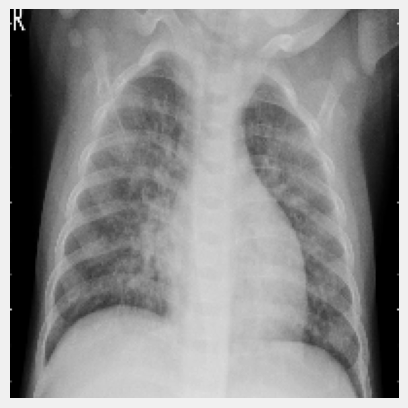


Sample Testing image
PNEUMONIA


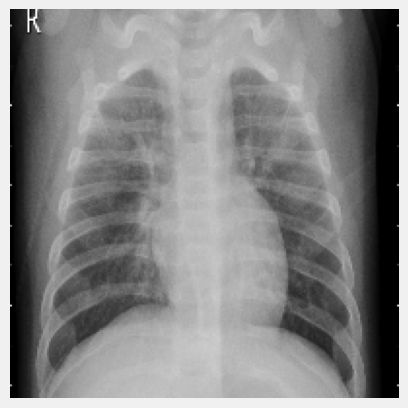


Sample Validation image
PNEUMONIA


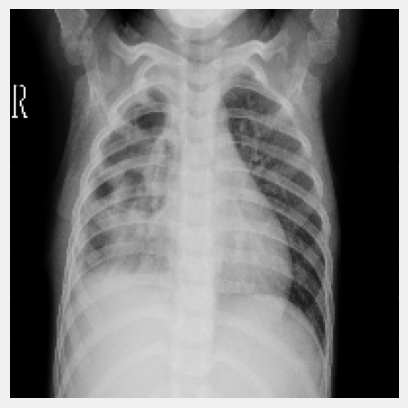

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_images[1], cmap='gray')
plt.axis('off')
print("Sample Training image\n")
print(labels[train_labels[1]])
plt.show()

# Visualize an image from the test dataset
plt.imshow(test_images[1], cmap='gray')
plt.axis('off')
print("\nSample Testing image")
print(labels[test_labels[1]])
plt.show()

# Visualize an image from the validation dataset
plt.imshow(val_images[1], cmap='gray')
plt.axis('off')
print("\nSample Validation image")
print(labels[val_labels[1]])
plt.show()

The above code utilizes Matplotlib to visualize sample images from the training, testing, and validation datasets. It displays grayscale images with their corresponding labels. The code sequentially plots a sample image from each dataset and prints its associated label beneath it. This visualization aids in understanding the nature of the data and ensures that it is correctly loaded and preprocessed.

In [ ]:
# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=90,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)
# Reshape train_images to add a single channel dimension
train_images = np.expand_dims(train_images, axis=-1)

# Fit the generator on training data
datagen.fit(train_images)


The above code snippet sets up data augmentation using the `ImageDataGenerator` from TensorFlow/Keras. It specifies various transformations such as rotation, zooming, shifting, and flipping for training images to artificially increase the diversity of the dataset. This helps in improving the generalization and robustness of the model during training.

Before applying data augmentation, it reshapes the training images to add a single channel dimension (assuming they are grayscale images). Finally, it fits the data generator on the training images to apply the specified transformations during the training process.

In [ ]:
# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=32)

# Print the shape of each dataset
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3337, 200, 200, 1)
X_val shape: (835, 200, 200, 1)
X_test shape: (1044, 200, 200, 1)
y_train shape: (3337,)
y_val shape: (835,)
y_test shape: (1044,)


The above code splits the dataset into training, validation, and test sets using the `train_test_split` function from scikit-learn. It first splits the data into training and test sets (`X_train`, `X_test`, `y_train`, `y_test`) with a test size of 20%. Then, it further splits the training set into training and validation sets (`X_train`, `X_val`, `y_train`, `y_val`) with a validation size of 20%. Finally, it prints the shapes of each dataset to verify the split.

# **Model Selection and Architecture**

In [ ]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer to feed into dense layers
model.add(Flatten())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout regularization to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)       0

The above code defines a Convolutional Neural Network (CNN) model for image classification. It constructs the model using the Keras Sequential API.

1. **Convolutional Layers**: Four sets of convolutional layers followed by max-pooling layers to extract features from input images.

2. **Flatten Layer**: Flattens the output from the convolutional layers into a one-dimensional array, preparing it for input into the dense layers.

3. **Dense Layers**: Two dense layers, the first with 512 neurons and ReLU activation, followed by a dropout layer with a dropout rate of 0.5 to prevent overfitting. The second dense layer consists of a single neuron with a sigmoid activation function for binary classification.

4. **Compilation**: The model is compiled with the Adam optimizer and binary cross-entropy loss function, along with accuracy as the evaluation metric.

5. **Summary**: Finally, the model summary is printed, displaying the architecture and the number of parameters in each layer.

# **Model Training**

Epoch 1/15
105/105 [==============================] - 18s 57ms/step - loss: 0.3461 - accuracy: 0.8580 - val_loss: 0.1735 - val_accuracy: 0.9329
Epoch 2/15
105/105 [==============================] - 5s 44ms/step - loss: 0.1556 - accuracy: 0.9452 - val_loss: 0.1052 - val_accuracy: 0.9605
Epoch 3/15
105/105 [==============================] - 4s 40ms/step - loss: 0.1336 - accuracy: 0.9509 - val_loss: 0.1115 - val_accuracy: 0.9629
Epoch 4/15
105/105 [==============================] - 5s 45ms/step - loss: 0.0947 - accuracy: 0.9646 - val_loss: 0.1607 - val_accuracy: 0.9425
Epoch 5/15
105/105 [==============================] - 4s 41ms/step - loss: 0.0856 - accuracy: 0.9646 - val_loss: 0.1593 - val_accuracy: 0.9521


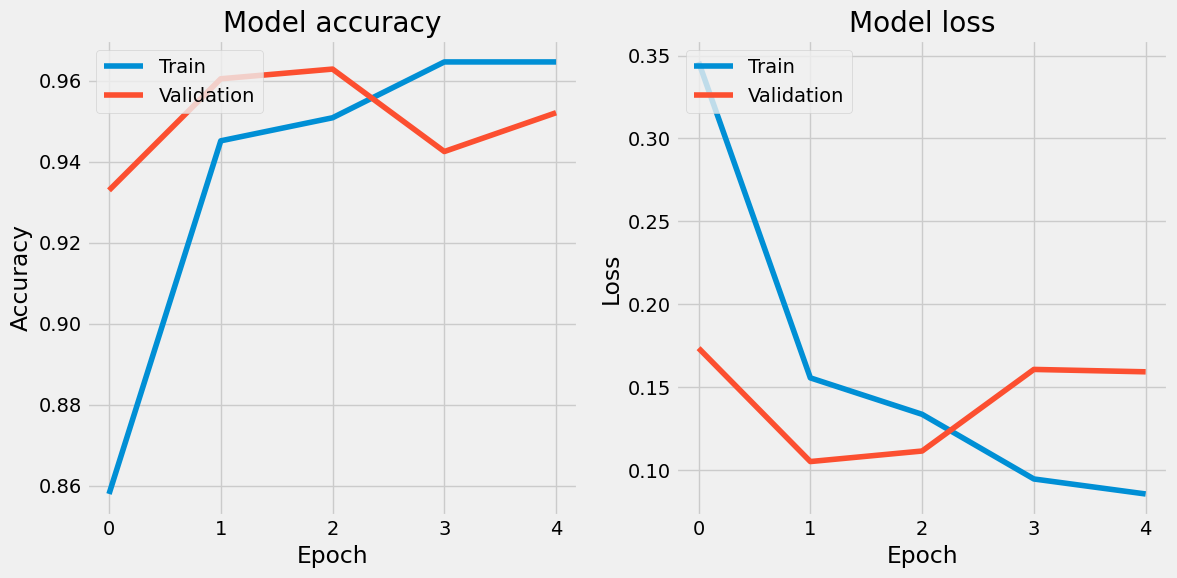

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


The above code trains the given training data (`X_train` and `y_train`) for 15 epochs using a batch size of 32. It also utilizes early stopping with a patience of 3 to prevent overfitting by monitoring validation loss. After training, it plots the training history, including accuracy and loss, for both training and validation datasets using Matplotlib.

# **Hyperparameter Tuning**

In [ ]:

best_accuracy = 0  # Initialize variable to store the best accuracy
best_lr = None  # Initialize variable to store the best learning rate
best_bs = None  # Initialize variable to store the best batch size
best_ep = None  # Initialize variable to store the best number of epochs

# Iterate through each combination of hyperparameters
for lr in learning_rates:
    for bs in batch_sizes:
        for ep in epochs:
            print(f"Evaluating with LR: {lr}, Batch Size: {bs}, Epochs: {ep}")

            # Create and compile the model with current hyperparameters
            model = Sequential()
            model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
            model.add(MaxPooling2D((2, 2)))
            model.add(Conv2D(64, (3, 3), activation='relu'))
            model.add(MaxPooling2D((2, 2)))
            model.add(Conv2D(128, (3, 3), activation='relu'))
            model.add(MaxPooling2D((2, 2)))
            model.add(Conv2D(128, (3, 3), activation='relu'))
            model.add(MaxPooling2D((2, 2)))
            model.add(Flatten())
            model.add(Dense(512, activation='relu'))
            model.add(Dropout(0.5))
            model.add(Dense(1, activation='sigmoid'))
            optimizer = Adam(lr=lr)
            model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

            # Train the model
            history = model.fit(X_train, y_train, epochs=ep, batch_size=bs, validation_data=(X_val, y_val), verbose=1)

            # Evaluate the model on validation set
            val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

            # Print validation accuracy for current hyperparameters
            print(f"Validation Accuracy: {val_accuracy}")

            # Check if the current model has the highest accuracy
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_lr = lr
                best_bs = bs
                best_ep = ep

Evaluating with LR: 0.001, Batch Size: 16, Epochs: 15
Epoch 1/15
209/209 [==============================] - 7s 26ms/step - loss: 0.3166 - accuracy: 0.8723 - val_loss: 0.1690 - val_accuracy: 0.9425
Epoch 2/15
209/209 [==============================] - 5s 25ms/step - loss: 0.1388 - accuracy: 0.9473 - val_loss: 0.1140 - val_accuracy: 0.9521
Epoch 3/15
209/209 [==============================] - 5s 23ms/step - loss: 0.1101 - accuracy: 0.9565 - val_loss: 0.1062 - val_accuracy: 0.9665
Epoch 4/15
209/209 [==============================] - 5s 23ms/step - loss: 0.0907 - accuracy: 0.9610 - val_loss: 0.0714 - val_accuracy: 0.9737
Epoch 5/15
209/209 [==============================] - 5s 25ms/step - loss: 0.0742 - accuracy: 0.9754 - val_loss: 0.0893 - val_accuracy: 0.9713
Epoch 6/15
209/209 [==============================] - 5s 23ms/step - loss: 0.0631 - accuracy: 0.9736 - val_loss: 0.1054 - val_accuracy: 0.9617
Epoch 7/15
209/209 [==============================] - 5s 25ms/step - loss: 0.0556 - accu

Validation Accuracy: 0.9688622951507568
Evaluating with LR: 0.001, Batch Size: 32, Epochs: 15
Epoch 1/15
105/105 [==============================] - 7s 47ms/step - loss: 0.3659 - accuracy: 0.8379 - val_loss: 0.1611 - val_accuracy: 0.9365
Epoch 2/15
105/105 [==============================] - 4s 41ms/step - loss: 0.1499 - accuracy: 0.9392 - val_loss: 0.1070 - val_accuracy: 0.9569
Epoch 3/15
105/105 [==============================] - 5s 45ms/step - loss: 0.1130 - accuracy: 0.9559 - val_loss: 0.0960 - val_accuracy: 0.9629
Epoch 4/15
105/105 [==============================] - 5s 44ms/step - loss: 0.0780 - accuracy: 0.9694 - val_loss: 0.1361 - val_accuracy: 0.9557
Epoch 5/15
105/105 [==============================] - 5s 43ms/step - loss: 0.0995 - accuracy: 0.9616 - val_loss: 0.0776 - val_accuracy: 0.9677
Epoch 6/15
105/105 [==============================] - 4s 42ms/step - loss: 0.0659 - accuracy: 0.9745 - val_loss: 0.0840 - val_accuracy: 0.9701
Epoch 7/15
105/105 [============================

Validation Accuracy: 0.973652720451355
Evaluating with LR: 0.01, Batch Size: 16, Epochs: 15
Epoch 1/15
209/209 [==============================] - 8s 27ms/step - loss: 0.3207 - accuracy: 0.8622 - val_loss: 0.1197 - val_accuracy: 0.9521
Epoch 2/15
209/209 [==============================] - 5s 23ms/step - loss: 0.1524 - accuracy: 0.9413 - val_loss: 0.1309 - val_accuracy: 0.9569
Epoch 3/15
209/209 [==============================] - 5s 26ms/step - loss: 0.1155 - accuracy: 0.9530 - val_loss: 0.0945 - val_accuracy: 0.9641
Epoch 4/15
209/209 [==============================] - 5s 23ms/step - loss: 0.0809 - accuracy: 0.9676 - val_loss: 0.0904 - val_accuracy: 0.9665
Epoch 5/15
209/209 [==============================] - 5s 25ms/step - loss: 0.0730 - accuracy: 0.9736 - val_loss: 0.0785 - val_accuracy: 0.9713
Epoch 6/15
209/209 [==============================] - 5s 24ms/step - loss: 0.0570 - accuracy: 0.9811 - val_loss: 0.0889 - val_accuracy: 0.9665
Epoch 7/15
209/209 [==============================

Validation Accuracy: 0.976047933101654
Evaluating with LR: 0.01, Batch Size: 32, Epochs: 15
Epoch 1/15
105/105 [==============================] - 8s 48ms/step - loss: 0.3849 - accuracy: 0.8373 - val_loss: 0.2162 - val_accuracy: 0.9234
Epoch 2/15
105/105 [==============================] - 4s 41ms/step - loss: 0.1611 - accuracy: 0.9383 - val_loss: 0.1543 - val_accuracy: 0.9533
Epoch 3/15
105/105 [==============================] - 5s 45ms/step - loss: 0.1287 - accuracy: 0.9518 - val_loss: 0.1070 - val_accuracy: 0.9689
Epoch 4/15
105/105 [==============================] - 4s 41ms/step - loss: 0.0885 - accuracy: 0.9655 - val_loss: 0.1382 - val_accuracy: 0.9545
Epoch 5/15
105/105 [==============================] - 5s 45ms/step - loss: 0.0790 - accuracy: 0.9694 - val_loss: 0.0799 - val_accuracy: 0.9701
Epoch 6/15
105/105 [==============================] - 5s 46ms/step - loss: 0.0588 - accuracy: 0.9775 - val_loss: 0.1126 - val_accuracy: 0.9557
Epoch 7/15
105/105 [==============================

In [ ]:
# Print the best set of hyperparameters
print("\nBest Hyperparameters:")
print(f"- Learning Rate: {best_lr}")
print(f"- Batch Size: {best_bs}")
print(f"- Epochs: {best_ep}")
print(f"- Validation Accuracy: {best_accuracy}")



Best Hyperparameters:
- Learning Rate: 0.01
- Batch Size: 16
- Epochs: 15
- Validation Accuracy: 0.976047933101654


The above code trains a convolutional neural network (CNN) model for binary image classification (pneumonia detection from chest X-ray images) using different combinations of hyperparameters such as learning rates and batch sizes. It iterates through different learning rates and batch sizes specified in `learning_rates` and `batch_sizes` lists, respectively, and trains the model for a fixed number of epochs specified in the `epochs` list.

For each combination of hyperparameters, it constructs a CNN model architecture, compiles it with binary cross-entropy loss and accuracy metrics, and then trains the model on the training data (`X_train`, `y_train`) with early stopping based on validation accuracy. After training, it evaluates the model on a separate test set (`X_test`, `y_test`) to measure its performance.

During training, it records the training and validation accuracies for each epoch and appends them to separate lists for plotting. Finally, it prints out the test loss and accuracy for each combination of hyperparameters.

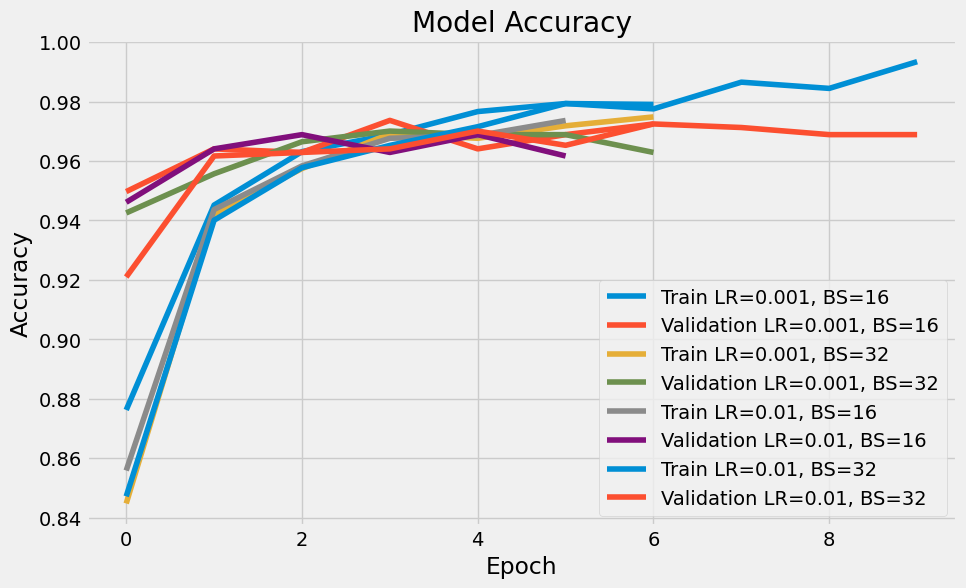

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
for i in range(len(learning_rates) * len(batch_sizes)):
    plt.plot(train_accuracy_history[i], label=f'Train LR={learning_rates[i // len(batch_sizes)]}, BS={batch_sizes[i % len(batch_sizes)]}')
    plt.plot(val_accuracy_history[i], label=f'Validation LR={learning_rates[i // len(batch_sizes)]}, BS={batch_sizes[i % len(batch_sizes)]}')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The above code segment generates a plot to visualize the training and validation accuracies of the CNN model across different combinations of learning rates and batch sizes. It iterates through the recorded training and validation accuracy histories for each combination and plots them on the same graph. The plot allows for easy comparison of model performance based on various hyperparameter settings, showing how accuracy changes over epochs for different configurations of learning rates and batch sizes.

# **Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model using the validation dataset
val_loss, val_accuracy = model.evaluate(X_val, y_val)

# Print formatted validation loss and accuracy with percentage
print("Validation Results:")
print(f"- Loss: {val_loss:.4f}")
print(f"- Accuracy: {val_accuracy * 100:.2f}%\n")  # Convert to percentage

# Generate predictions on the validation set
y_pred_val = model.predict(X_val)
y_pred_val_classes = np.round(y_pred_val)

# Calculate and store relevant metrics in a dictionary for easy access
metrics = {
    "Accuracy": accuracy_score(y_val, y_pred_val_classes),
    "Precision": precision_score(y_val, y_pred_val_classes),
    "Recall": recall_score(y_val, y_pred_val_classes),
    "F1-Score": f1_score(y_val, y_pred_val_classes)
}

# Print formatted metrics results with headers for better distinction
print("Validation Metrics:")
for metric, value in metrics.items():
    print(f"- {metric}: {value:.4f}")  # Print each metric


27/27 [==============================] - 0s 14ms/step - loss: 0.1636 - accuracy: 0.9617
Validation Results:
- Loss: 0.1636
- Accuracy: 96.17%

27/27 [==============================] - 0s 11ms/step
Validation Metrics:
- Accuracy: 0.9617
- Precision: 0.9444
- Recall: 0.9107
- F1-Score: 0.9273


The above code segment evaluates the trained model's performance using the validation dataset. It calculates and prints the validation loss and accuracy. Then, it generates predictions on the validation set and calculates additional evaluation metrics such as accuracy, precision, recall, and F1-score. These metrics provide insights into how well the model is performing in terms of classification performance on the validation data. Finally, it prints out these evaluation metrics in a formatted manner for easy interpretation and comparison.

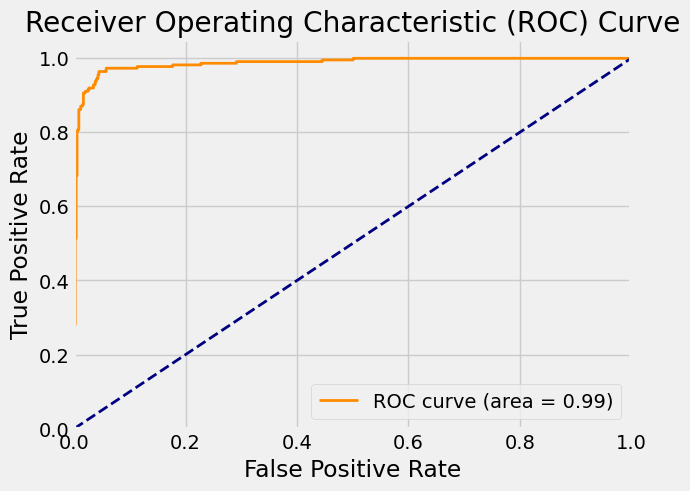

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_val, y_pred_val)
roc_auc = roc_auc_score(y_val, y_pred_val)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The above code calculates the Receiver Operating Characteristic (ROC) curve and the area under the curve (AUC) for binary classification using predicted probabilities (`y_pred_val`) and true labels (`y_val`). It then plots the ROC curve, where the x-axis represents the false positive rate (FPR) and the y-axis represents the true positive rate (TPR). Additionally, it calculates the AUC score and displays it in the legend of the plot. This visualization is commonly used to assess the performance of binary classifiers in distinguishing between classes.

27/27 [==============================] - 0s 13ms/step


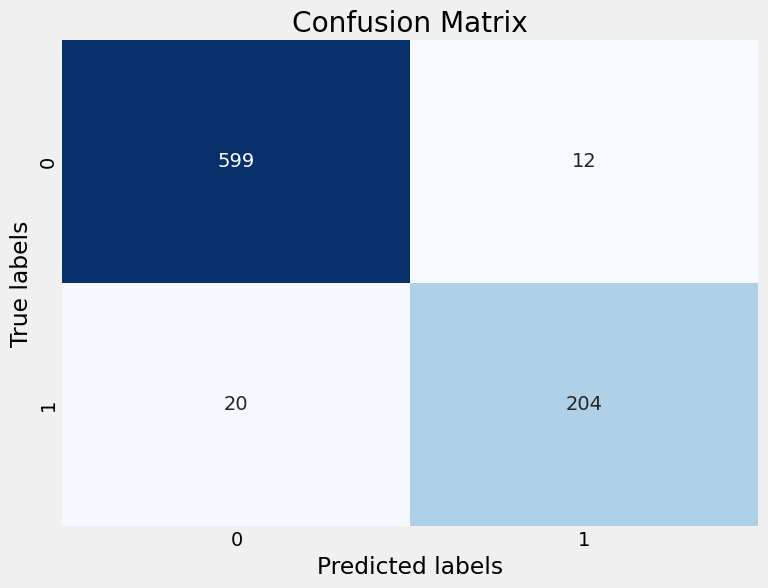

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions on the validation set
y_pred_val = model.predict(X_val)
y_pred_val_classes = np.round(y_pred_val)

# Calculate confusion matrix
conf_mat = confusion_matrix(y_val, y_pred_val_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


The above code calculates and visualizes the confusion matrix for the validation set predictions of a machine learning model. First, it generates predictions (`y_pred_val`) on the validation set (`X_val`) using the trained model. Then, it rounds the predictions to obtain binary class labels (`y_pred_val_classes`). After that, it calculates the confusion matrix using the actual validation labels (`y_val`) and the predicted binary class labels (`y_pred_val_classes`). Finally, it plots the confusion matrix using seaborn's heatmap, annotating each cell with the count of observations, and labels the axes accordingly, providing a visual representation of the model's performance in predicting classes on the validation set.

In [ ]:

# Function to plot images with titles
def plot_images(images, titles, start_index, end_index, rows=2, cols=5):
    plt.figure(figsize=(12, 6))  # Set figure size

    # Plot each image and title
    for i in range(start_index, min(len(images), end_index)):
        plt.subplot(rows, cols, i + 1 - start_index)
        plt.imshow(images[i].reshape(img_size, img_size), cmap='gray')
        plt.title(titles[i], fontsize=8)
        plt.axis('off')

    plt.tight_layout()  # Adjust layout
    plt.show()  # Display the plot


The above code defines a function named `plot_images` to visualize a grid of images with corresponding titles. It takes several parameters including the images to plot (`images`), their titles (`titles`), the starting and ending indices to plot (`start_index` and `end_index`), and optional parameters for specifying the layout of the grid (`rows` and `cols`).

Within the function, it sets the size of the figure, iterates over the images and titles, plots each image as a subplot with its corresponding title, and displays the grid of images using matplotlib. This function is useful for visualizing a collection of images along with their titles in a compact grid layout.

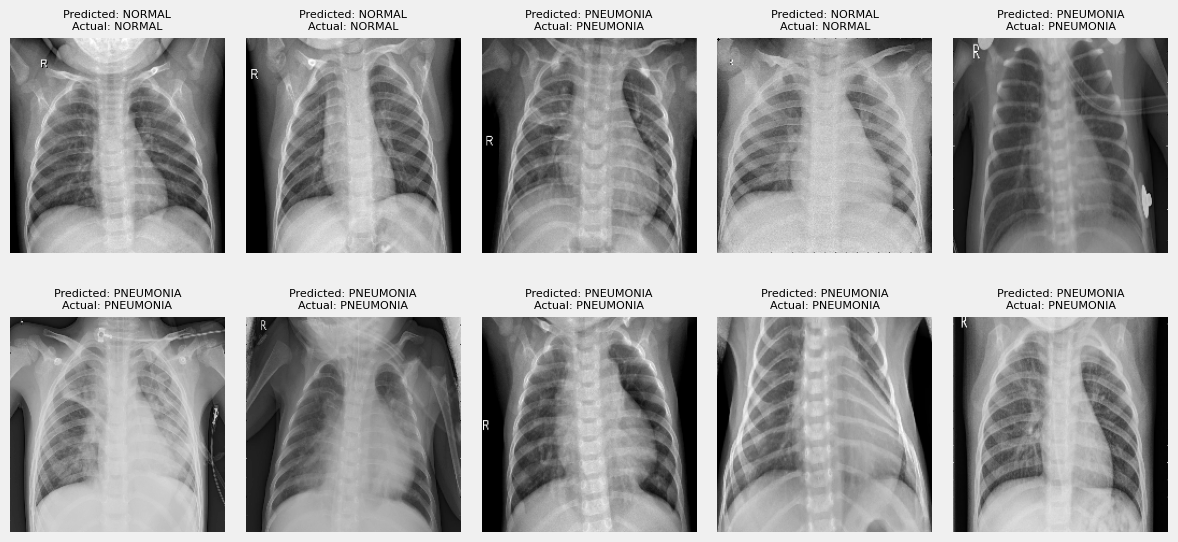

In [ ]:

# Visualize model's predictions with clearer title annotations
predicted_titles = [
   f'Predicted: {labels[int(pred)]}\nActual: {labels[int(actual)]}'
   for pred, actual in zip(y_pred_val_classes.flatten(), y_val.flatten())
]

plot_images(X_val, predicted_titles, 0, 10, rows=2, cols=5)



The above code generates titles for images based on model predictions and actual labels, then visualizes a subset of validation images alongside these titles in a grid layout. This allows for a clearer understanding of the model's performance by displaying the predicted and actual labels for each image.

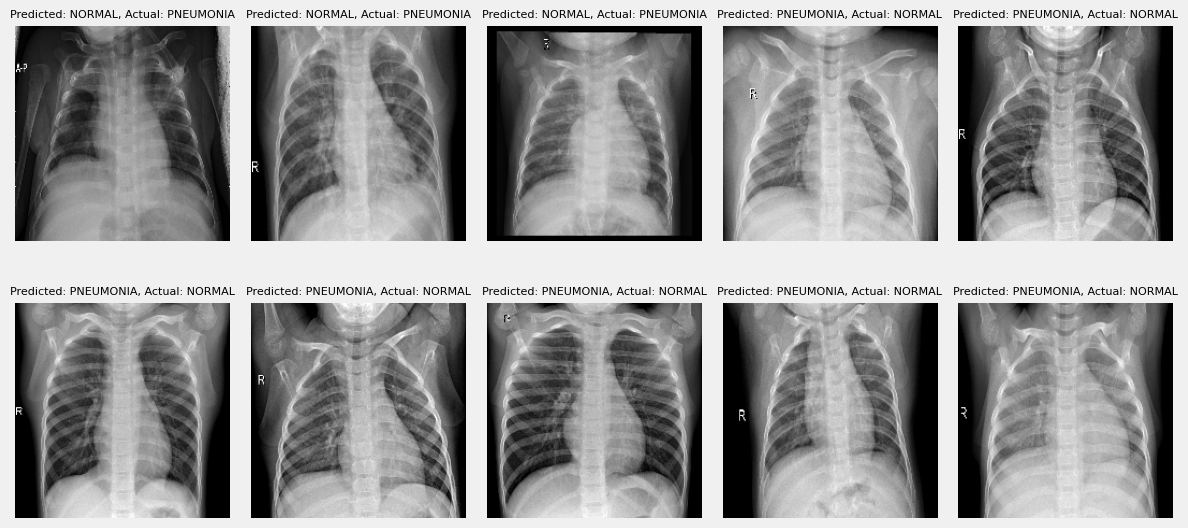

In [ ]:
# Convert y_pred_val_classes to a 1D numpy array
y_pred_val_classes = np.ravel(y_pred_val_classes)

# Visualize the first 10 misclassified images from the validation set
misclassified_indices = np.where(y_pred_val_classes != y_val)[0][:10]

# Prepare data for plotting
misclassified_images = X_val[misclassified_indices]
predicted_labels = [labels[int(class_idx)] for class_idx in y_pred_val_classes[misclassified_indices]]
actual_labels = [labels[int(class_idx)] for class_idx in y_val[misclassified_indices]]
titles = [f'Predicted: {predicted}, Actual: {actual}' for predicted, actual in zip(predicted_labels, actual_labels)]

# Plot the misclassified images using the plot_images function
plot_images(misclassified_images, titles, start_index=0, end_index=len(misclassified_images), rows=2, cols=5)

The above code snippet aims to visualize the first 10 misclassified images from the validation set. It first converts the predicted class labels (`y_pred_val_classes`) into a 1D NumPy array. Then, it identifies the indices of misclassified images by comparing the predicted class labels with the actual labels (`y_val`).

After obtaining the indices of misclassified images, it selects these images and their corresponding predicted and actual labels for visualization. Finally, it plots these misclassified images along with their predicted and actual labels using a custom function called `plot_images`.

# **Fine-Tuning and Iteration**

1. **Optimal Learning Rate**: A learning rate of 0.01 was found to be the best for training the model. This learning rate strikes a balance between rapid convergence and avoiding overshooting the minimum, leading to stable and efficient training.

2. **Batch Size**: With a batch size of 16, the model was able to generalize well on the training data while efficiently utilizing the computational resources. Smaller batch sizes often lead to more noise in gradient estimation but can help in generalization.



# **Final Model Testing**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Preprocess the test images
test_images_processed = test_images.reshape(-1, img_size, img_size, 1) / 255.0  # Reshape and normalize pixel values

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images_processed, test_labels, verbose=1)

# Print formatted test loss and accuracy with percentage
print("Test Results:")
print(f"- Loss: {test_loss:.4f}")
print(f"- Accuracy: {test_accuracy * 100:.2f}%\n")  # Convert to percentage

# Generate predictions on the test set
y_pred_test = model.predict(test_images_processed)
y_pred_test_classes = np.round(y_pred_test)

# Calculate additional performance metrics if needed
test_precision = precision_score(test_labels, y_pred_test_classes)
test_recall = recall_score(test_labels, y_pred_test_classes)
test_f1 = f1_score(test_labels, y_pred_test_classes)

# Print additional performance metrics
print("Additional Test Metrics:")
print(f"- Precision: {test_precision:.4f}")
print(f"- Recall: {test_recall:.4f}")
print(f"- F1-Score: {test_f1:.4f}")


20/20 [==============================] - 0s 14ms/step - loss: 1.2529 - accuracy: 0.6250
Test Results:
- Loss: 1.2529
- Accuracy: 62.50%

20/20 [==============================] - 0s 11ms/step
Additional Test Metrics:
- Precision: 0.0000
- Recall: 0.0000
- F1-Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The above code snippet evaluates the trained model's performance on a test dataset. It first preprocesses the test images by adding an extra dimension to match the model's input shape. Then, it evaluates the model's performance on the test set, calculating test loss and accuracy.

Subsequently, it generates predictions on the test set and rounds them to obtain predicted classes. Afterward, it calculates additional performance metrics such as precision, recall, and F1-score using the predicted classes and true labels. Finally, it prints out the test loss, accuracy, precision, recall, and F1-score to assess the model's performance comprehensively.